In [1]:
import pandas as pd
from pathlib import Path

In [2]:
mouse_data_to_load = Path("mouse_metadata.csv")
study_data_to_load = Path("study_results.csv")

In [3]:
mouse_data = pd.read_csv(mouse_data_to_load)
study_data = pd.read_csv(study_data_to_load)

In [4]:
merged_data = pd.merge(mouse_data, study_data, on="Mouse ID", how="outer")

print(merged_data)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [5]:
unique_mice_count = merged_data["Mouse ID"].nunique()
print("Number of unique mice IDs:", unique_mice_count)

Number of unique mice IDs: 249


In [6]:
duplicate_timepoints = merged_data.groupby(['Mouse ID', 'Timepoint']).size().reset_index(name='count')
duplicate_timepoints = duplicate_timepoints[duplicate_timepoints['count'] > 1]
if not duplicate_timepoints.empty:
    print("Mouse IDs with duplicate time points:")
    print(duplicate_timepoints['Mouse ID'].unique())
else:
    print("No mouse IDs with duplicate time points found.")

Mouse IDs with duplicate time points:
['g989']


In [7]:

duplicate_timepoints = merged_data.groupby(['Mouse ID', 'Timepoint']).size().reset_index(name='count')
duplicate_timepoints = duplicate_timepoints[duplicate_timepoints['count'] > 1]

if not duplicate_timepoints.empty:
    print("Mouse IDs with duplicate time points:")
    print(duplicate_timepoints['Mouse ID'].unique())
    
    for mouse_id in duplicate_timepoints['Mouse ID'].unique():
        mouse_data_duplicate = merged_data[merged_data['Mouse ID'] == mouse_id]
        print(f"Data associated with mouse ID {mouse_id}:")
        print(mouse_data_duplicate)
else:
    print


Mouse IDs with duplicate time points:
['g989']
Data associated with mouse ID g989:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21        

In [8]:
import pandas as pd
from pathlib import Path

mouse_data_to_load = Path("mouse_metadata.csv")
study_data_to_load = Path("study_results.csv")
mouse_data = pd.read_csv(mouse_data_to_load)
study_data = pd.read_csv(study_data_to_load)

merged_data = pd.merge(mouse_data, study_data, on="Mouse ID", how="outer")

duplicate_timepoints = merged_data.groupby(['Mouse ID', 'Timepoint']).size().reset_index(name='count')
duplicate_timepoints = duplicate_timepoints[duplicate_timepoints['count'] > 1]

if not duplicate_timepoints.empty:
  
    merged_data_cleaned = merged_data[~merged_data['Mouse ID'].isin(duplicate_timepoints['Mouse ID'].unique())]
    
    unique_mice_count_cleaned = merged_data_cleaned["Mouse ID"].nunique()
    print("Number of unique mice IDs after cleaning:", unique_mice_count_cleaned)
else:
    print("No mouse IDs with duplicate time points found.")


Number of unique mice IDs after cleaning: 248


In [9]:
summary_stats = merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

summary_stats.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']

print(summary_stats)


                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.322552  50.854632  42.351070            6.507770  0.512884
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


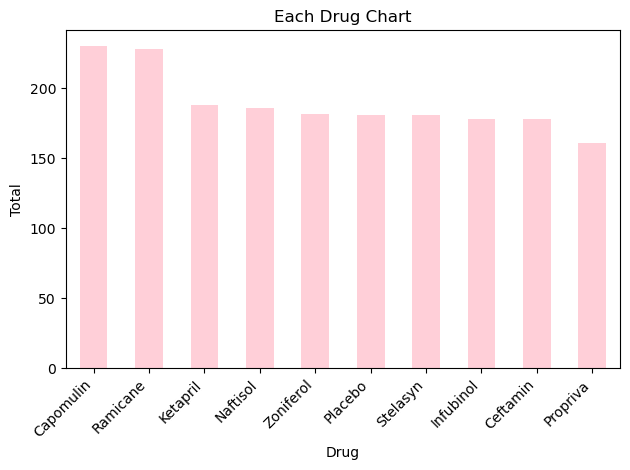

In [10]:
import matplotlib.pyplot as plt

total_rows = merged_data['Drug Regimen'].value_counts()
total_rows.plot(kind='bar', color='pink', alpha=0.75)
plt.title('Each Drug Chart')
plt.xlabel('Drug')
plt.ylabel('Total')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


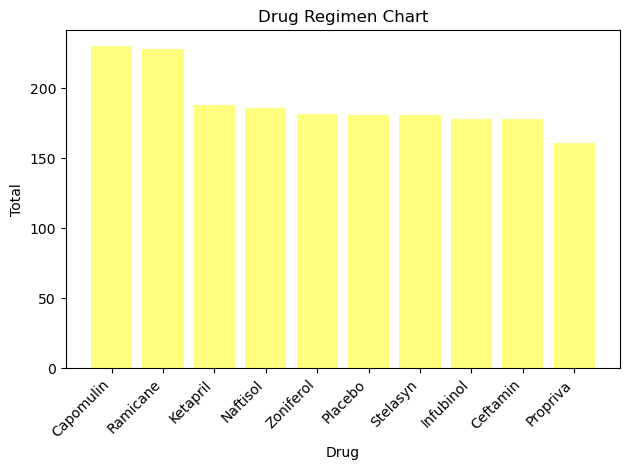

In [11]:
import matplotlib.pyplot as plt

# Calculate the total number of rows for each drug regimen
total_rows = merged_data['Drug Regimen'].value_counts()

# Create the bar chart using Matplotlib's pyplot methods
plt.bar(total_rows.index, total_rows.values, color='yellow', alpha=0.50)
plt.title('Drug Regimen Chart')
plt.xlabel('Drug')
plt.ylabel('Total')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


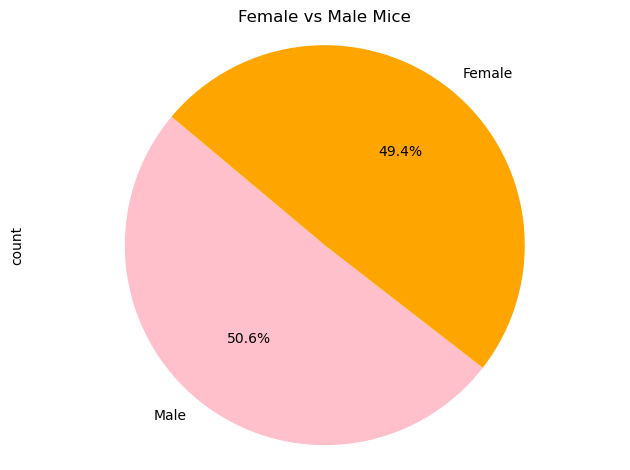

In [12]:
import matplotlib.pyplot as plt

gender_distribution = merged_data['Sex'].value_counts()

gender_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['pink', 'orange'], startangle=140)
plt.title('Female vs Male Mice')
plt.axis('equal') 
plt.tight_layout()
plt.show()


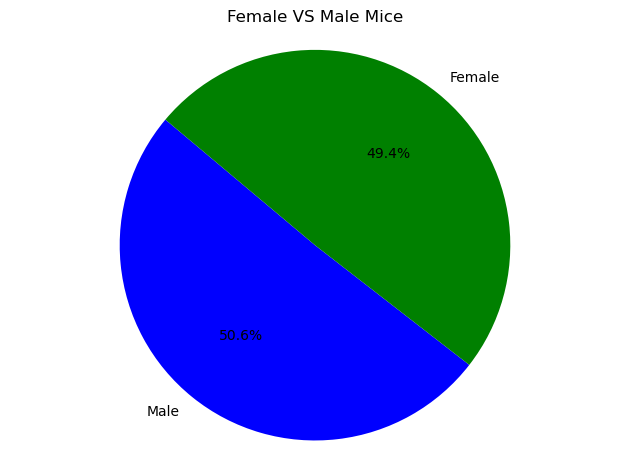

In [13]:
import matplotlib.pyplot as plt
gender_distribution = merged_data['Sex'].value_counts()
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=['blue', 'green'], startangle=140)
plt.title('Female VS Male Mice')
plt.axis('equal')  
plt.tight_layout()
plt.show()


In [14]:

last_timepoint = merged_data_cleaned.groupby('Mouse ID')['Timepoint'].max().reset_index()


last_timepoint.rename(columns={'Timepoint': 'Last Timepoint'}, inplace=True)

merged_data_with_last_timepoint = pd.merge(merged_data_cleaned, last_timepoint, on='Mouse ID', how='inner')

print(merged_data_with_last_timepoint)


     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1875     z969     Naftisol  Male           9          30         25   
1876     z969     Naftisol  Male           9          30         30   
1877     z969     Naftisol  Male           9          30         35   
1878     z969     Naftisol  Male           9          30         40   
1879     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  Last Timepoint  
0              45.000000                 0              45  
1              38.825898 

In [15]:
treatment_names = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

tumor_volume_data = []

last_timepoint = merged_data_cleaned.groupby('Mouse ID')['Timepoint'].max().reset_index()

last_timepoint.rename(columns={'Timepoint': 'Last Timepoint'}, inplace=True)

merged_data_with_last_timepoint = pd.merge(merged_data_cleaned, last_timepoint, on='Mouse ID', how='inner')

print(merged_data_with_last_timepoint)


     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1875     z969     Naftisol  Male           9          30         25   
1876     z969     Naftisol  Male           9          30         30   
1877     z969     Naftisol  Male           9          30         35   
1878     z969     Naftisol  Male           9          30         40   
1879     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  Last Timepoint  
0              45.000000                 0              45  
1              38.825898 

In [16]:

for treatment in treatment_names:
    treatment_rows = merged_data_with_last_timepoint.loc[merged_data_with_last_timepoint['Drug Regimen'] == treatment]

    tumor_volume_data.append(treatment_rows['Tumor Volume (mm3)'].tolist())

print(tumor_volume_data)


[[45.0, 43.87849569, 37.61494768, 38.17723195, 36.86687576, 33.94994037, 32.95967078, 28.32853059, 25.47214326, 23.34359787, 45.0, 45.47375302, 39.11389068, 39.77625003, 36.06583471, 36.61712031, 32.91529186, 30.20682488, 28.16739732, 28.48403281, 45.0, 41.40859145, 36.82536664, 35.46461175, 34.2557317, 33.11875607, 31.75827491, 30.83435704, 31.3780453, 28.43096411, 45.0, 38.79647373, 35.6244027, 32.62300253, 30.48598484, 45.0, 45.76088647, 46.56841719, 47.21219992, 40.34394812, 35.50361557, 35.9783344, 35.45948978, 36.02413752, 31.02392294, 45.0, 41.01991315, 41.63001026, 42.28366512, 40.71642815, 38.9927339, 35.72602314, 36.3278696, 31.47541076, 31.8962384, 45.0, 45.78174579, 39.0054935, 35.46375763, 36.01558858, 33.89334515, 32.68065459, 33.06933705, 31.80484133, 32.37735684, 45.0, 45.62238149, 46.4145177, 39.80445341, 38.90934919, 37.69543154, 38.21247939, 32.56283914, 32.94761484, 33.32909778, 45.0, 45.8956472, 46.74900552, 44.44094861, 39.0702138, 37.34220976, 32.86891617, 33.515

In [17]:

treatment_data = dict(zip(treatment_names, tumor_volume_data))


outliers = {}


for treatment, volumes in treatment_data.items():

    quartiles = pd.Series(volumes).quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]

    iqr = upper_quartile - lower_quartile


    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)

    outliers[treatment] = [volume for volume in volumes if volume < lower_bound or volume > upper_bound]


for treatment, outlier_volumes in outliers.items():
    print(f"Outliers for {treatment}: {outlier_volumes}")


Outliers for Capomulin: [25.47214326, 23.34359787]
Outliers for Ramicane: [22.05012627]
Outliers for Infubinol: []
Outliers for Ceftamin: []


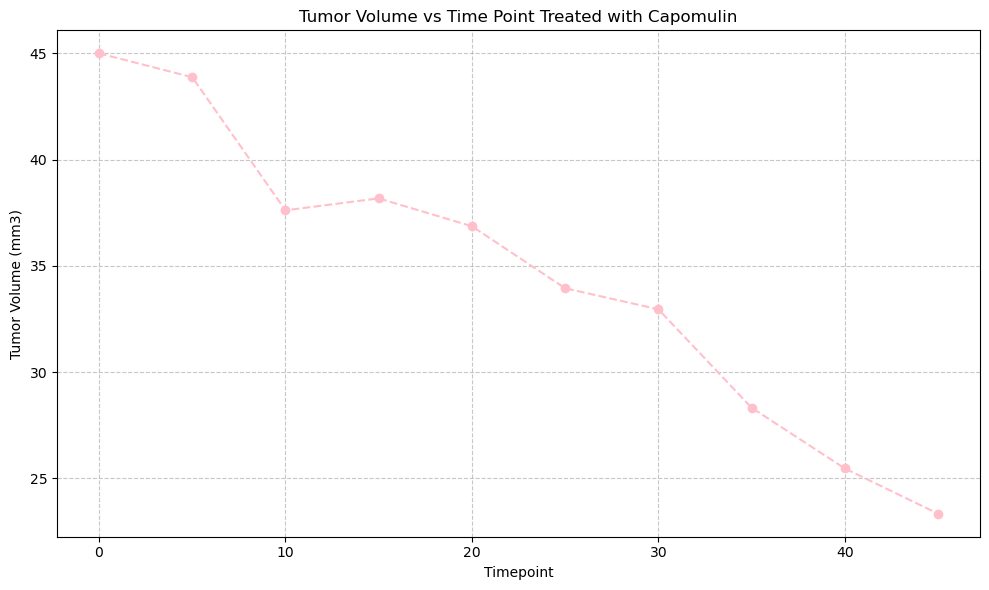

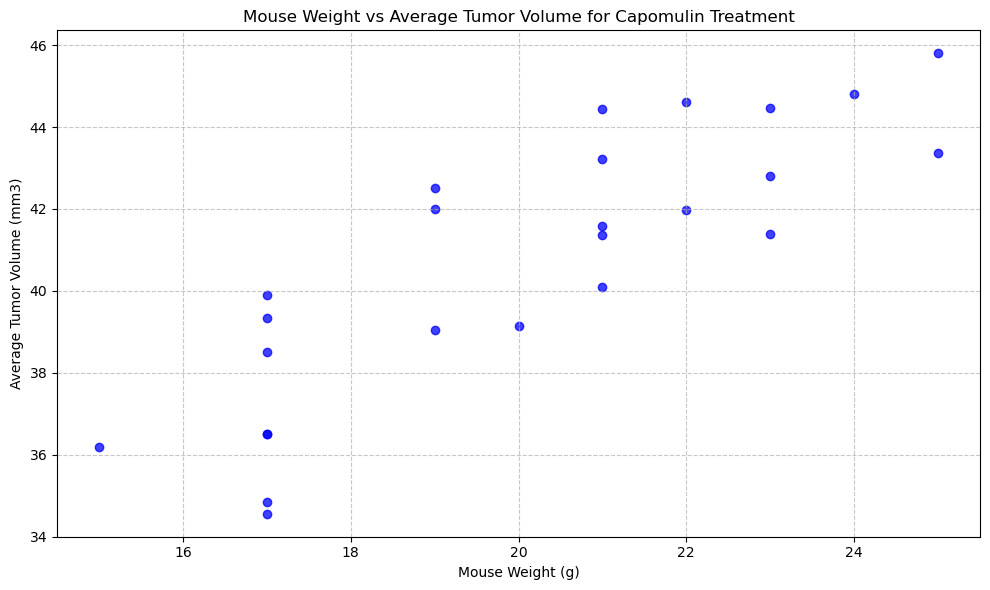

In [18]:
import matplotlib.pyplot as plt

capomulin_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin']
single_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == 's185']

plt.figure(figsize=(10, 6))
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], marker='o', color='pink', linestyle='--')
plt.title('Tumor Volume vs Time Point Treated with Capomulin')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, average_tumor_volume, color='blue', alpha=0.75)
plt.title('Mouse Weight vs Average Tumor Volume for Capomulin Treatment')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



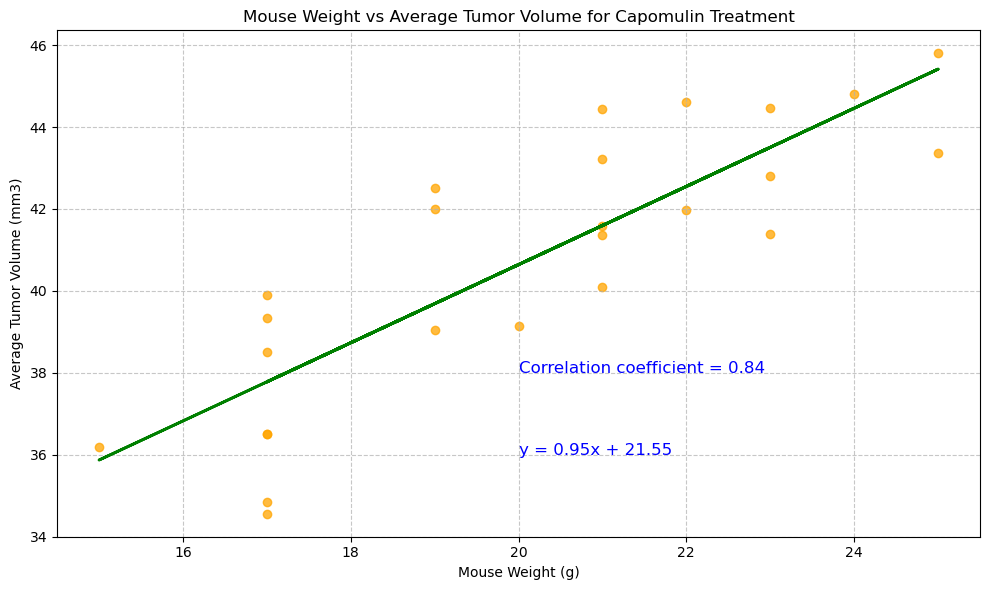

In [19]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

correlation = average_tumor_volume.corr(mouse_weight)

slope, intercept, rvalue, pvalue, stderr = linregress(mouse_weight, average_tumor_volume)

plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, average_tumor_volume, color='orange', alpha=0.75)
plt.title('Mouse Weight vs Average Tumor Volume for Capomulin Treatment')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True, linestyle='--', alpha=0.7)


plt.plot(mouse_weight, slope * mouse_weight + intercept, color='green', linestyle='-', linewidth=2)


line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(line_eq, (20, 36), fontsize=12, color='blue')

correlation_text = f'Correlation coefficient = {correlation:.2f}'
plt.annotate(correlation_text, (20, 38), fontsize=12, color='blue')

plt.tight_layout()
plt.show()
